In [3]:
import gym
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from functools import partial
%matplotlib inline
plt.style.use("ggplot")

In [4]:
env = gym.make("Blackjack-v0")

# we define the policy function which takes the current state and check if the score is greater than or equal to 20, if yes return 0 or else 1, if score >=20--stand(0) else hit (1)


In [6]:
def sample_policy(observation):
    score,dealer_score,usable_ace = observation
    return 0 if score>=20 else 1

In [18]:
#generate episodes -- iterations
def generate_episodes(policy,env):
    states, actions, rewards = [],[],[]
    
    observation = env.reset()
    
    while True:
        states.append(observation)
        
        action = sample_policy(observation)
        actions.append(action)
        
        observation, reward, done, info = env.step(action)
        rewards.append(reward)
        
        if done:
            break
    return states, actions, rewards

In [28]:
def first_visit_mc_prediction(policy,env,n_episodes):
    value_table = defaultdict(float)
    N = defaultdict(int)
    
    for _ in range(n_episodes):
        states, _, rewards = generate_episodes(policy, env)
        returns = 0
        
        for t in range(len(states) - 1, -1,-1):
            R = rewards[t]
            S = states[t]
            returns+=R
            
            
            if S not in states[:t]:
                N[S]+=1
                value_table[S] +=(returns - value_table[S]/N[S])
                
                
    return value_table

In [46]:
value = first_visit_mc_prediction(sample_policy,env,n_episodes=5000)

In [47]:
value

defaultdict(float,
            {(18, 3, False): -16.404761904761905,
             (18, 5, False): -25.3015873015873,
             (12, 5, False): -12.1025641025641,
             (20, 3, False): 30.629213483146064,
             (10, 3, False): 1.8636363636363635,
             (20, 9, False): 34.31168831168832,
             (16, 10, False): -66.70149253731348,
             (17, 6, False): -20.06779661016949,
             (13, 2, False): -4.742857142857143,
             (13, 5, False): -13.249999999999996,
             (19, 10, False): -74.75362318840578,
             (8, 10, False): -12.204081632653061,
             (18, 10, False): -78.73755656108592,
             (21, 8, True): 14.5,
             (13, 4, False): -15.357142857142858,
             (10, 4, False): 0.2272727272727273,
             (21, 10, True): 36.92857142857142,
             (16, 6, False): -18.92156862745098,
             (21, 7, False): 16.649999999999995,
             (14, 7, False): -9.403846153846155,
             

In [48]:
for i in range(10):
    print(value.popitem())

((4, 4, False), -1.0)
((12, 6, True), -1.0)
((4, 6, False), -1.0)
((13, 7, True), -1.0)
((13, 2, True), 0.0)
((14, 3, True), -1.4)
((5, 2, False), -2.0)
((14, 8, True), 0.5)
((12, 4, True), 1.0)
((14, 7, True), 0.5)


In [49]:
def plot_blackjack(V,ax1,ax2):
    player_sum = np.arange(12,21+1)
    dealer_show = np.arange(1, 10 + 1)
    usable_ace = np.array([False,True])
    state_values = np.zeros((len(player_sum),len(dealer_show), len(usable_ace)))
    
    for i, player in enumerate(player_sum):
        for j, dealer in enumerate(dealer_show):
            for k, ace in enumerate(usable_ace):
                state_values[i,j,k] = V[player, dealer, ace]
    X,Y = np.meshgrid(player_sum,dealer_show)
    
    ax1.plot_wireframe(X,Y,state_values[:,:,0])
    ax2.plot_wireframe(X,Y,state_values[:,:,1])
    
    for ax in ax1,ax2:
        ax.set_zlim(-1,1)
        ax.set_ylabel("player sum")
        ax.set_xlabel("dealer show")
        ax.set_zlabel("state-value")

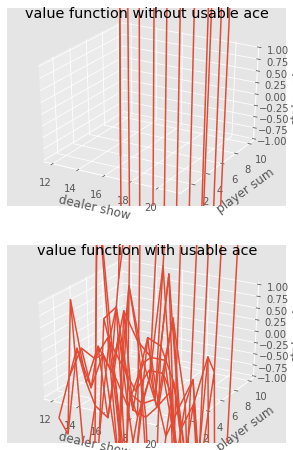

In [50]:
fif,axes = pyplot.subplots(nrows = 2, figsize = (5,8), subplot_kw ={"projection": '3d'})
axes[0].set_title('value function without usable ace')
axes[1].set_title("value function with usable ace")
plot_blackjack(value,axes[0],axes[1])